# Importing libraries and reading data

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings

In [2]:
data = pd.read_csv("Titanic-Dataset.csv")

# Data Wrangling

In [3]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 881
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  857 non-null    int64  
 1   Pclass    857 non-null    int64  
 2   Sex       857 non-null    object 
 3   Age       857 non-null    float64
 4   SibSp     857 non-null    int64  
 5   Parch     857 non-null    int64  
 6   Fare      857 non-null    float64
 7   Embarked  857 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 60.3+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Removing unnecessary columns

In [7]:
data = data.drop(columns=["PassengerId","Name","Cabin","Ticket"])

## Cleaning up the NaNs

In [8]:
data[data["SibSp"]==8]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
159,0,3,male,NaN,8,2,69.55,S
180,0,3,female,NaN,8,2,69.55,S
201,0,3,male,NaN,8,2,69.55,S
324,0,3,male,NaN,8,2,69.55,S
792,0,3,female,NaN,8,2,69.55,S
846,0,3,male,NaN,8,2,69.55,S
863,0,3,female,NaN,8,2,69.55,S


In [9]:
data = data.drop(data[data["SibSp"]==8].index)

In [10]:
data.groupby(["Survived","Pclass","SibSp"])["Age"].mean()

Survived  Pclass  SibSp
0         1       0        46.375000
                  1        38.500000
                  2        44.000000
                  3        19.000000
          2       0        33.833333
                  1        34.239130
                  2        25.000000
          3       0        29.103175
                  1        27.966667
                  2        24.444444
                  3         5.428571
                  4         6.800000
                  5        10.200000
1         1       0        34.594203
                  1        36.998298
                  2        35.500000
                  3        23.500000
          2       0        29.333261
                  1        22.421875
                  2        13.250000
                  3        30.000000
          3       0        22.990333
                  1        17.277778
                  2         2.166667
                  3        33.000000
                  4         8.333333
Name: Age, dty

In [11]:
data['Age'] = data['Age'].fillna(data.groupby(["Survived","Pclass","SibSp"])["Age"].transform('mean'))

In [12]:
data[data.isna().any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,female,38.0,0,0,80.0,NaN
829,1,1,female,62.0,0,0,80.0,NaN


In [13]:
data=data.dropna().reset_index(drop=True)

## Removing outliers using zscore method

In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,882.000000,882.000000,882.000000,882.000000,882.000000,882.000000
mean,0.385488,2.306122,29.525662,0.464853,0.369615,31.799432
std,0.486986,0.835742,13.509299,0.883324,0.796919,49.781845
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,29.103175,0.000000,0.000000,14.454200
75%,1.000000,3.000000,36.000000,1.000000,0.000000,30.500000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


In [20]:
data = data[(np.abs(stats.zscore(data[['Age','Fare']])) < 3).all(axis=1)]

# Univariate Analysis

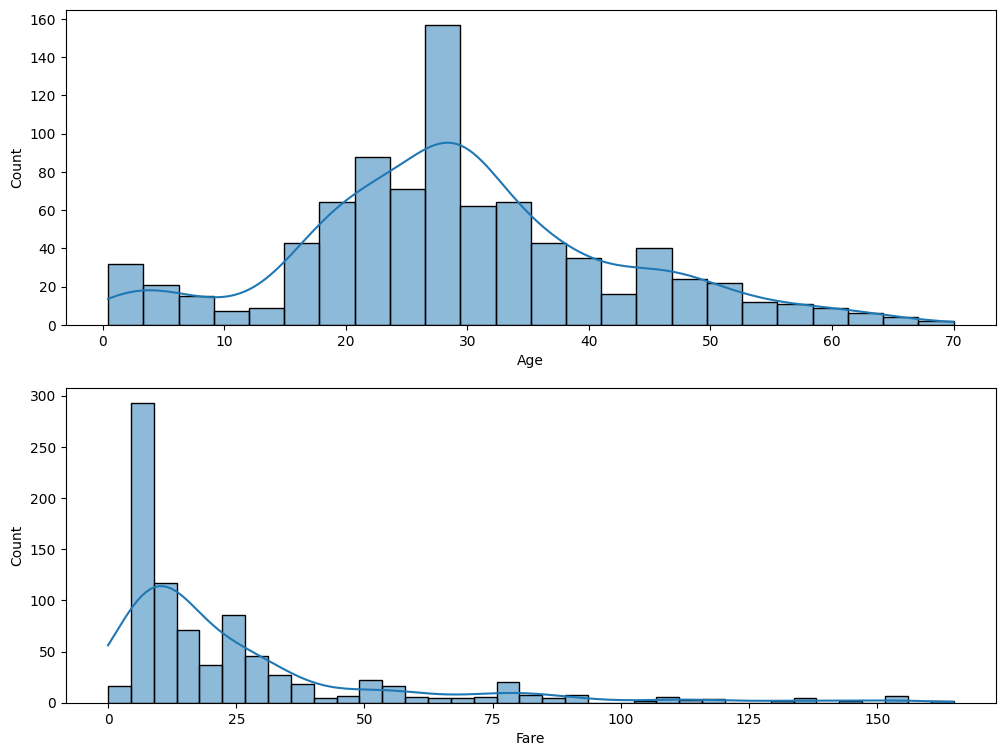

In [32]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Age','Fare']):
    plt.subplot(2,1,i+1)
    sns.histplot(data=data,x=col,kde=True)

In [28]:
data.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

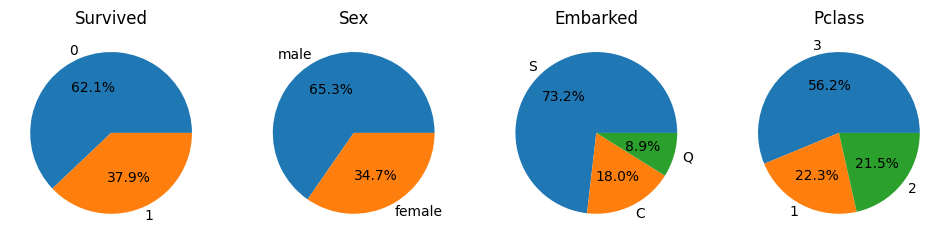

In [45]:
plt.figure(figsize=(12,9))
for i,col in enumerate(['Survived','Sex','Embarked','Pclass']):
    plt.subplot(1,4,i+1)
    x=data[col].value_counts().reset_index()
    plt.title(f"{col}")
    plt.pie(x=x['count'],labels=x[col],autopct="%0.1f%%")

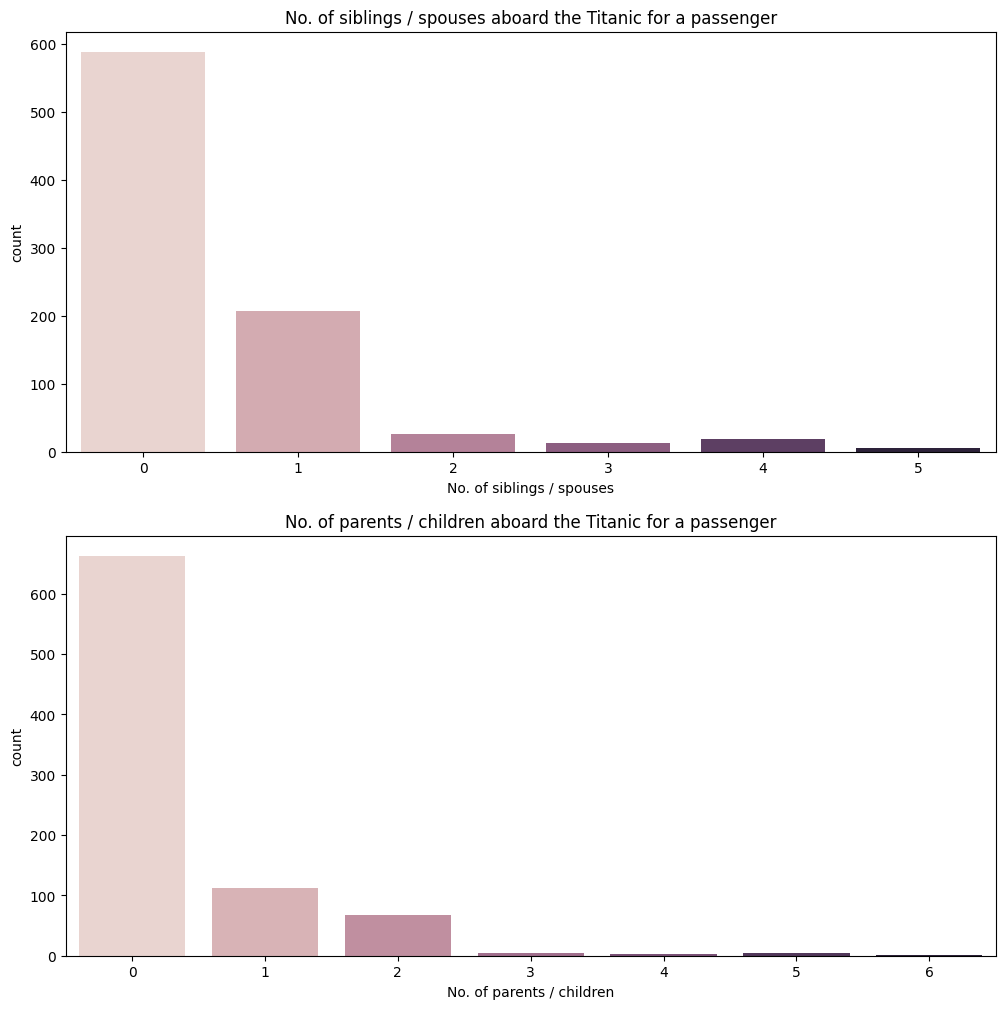

In [63]:
plt.figure(figsize=(12,12))

plt.subplot(2,1,1)
sns.countplot(data=data,x="SibSp",hue="SibSp",legend=False)
plt.title("No. of siblings / spouses aboard the Titanic for a passenger")
plt.xlabel("No. of siblings / spouses")

plt.subplot(2,1,2)
sns.countplot(data=data,x="Parch",hue="Parch",legend=False)
plt.title("No. of parents / children aboard the Titanic for a passenger")
plt.xlabel("No. of parents / children")

plt.show()

# Multivariate Analysis

In [35]:
data.groupby("Survived")["Age"].mean()

Survived
0    30.270726
1    27.438023
Name: Age, dtype: float64

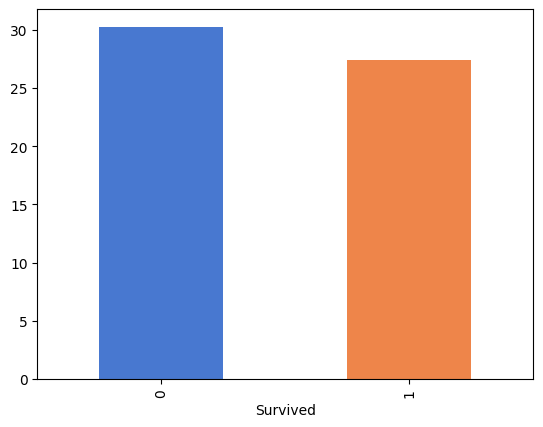

In [64]:
data.groupby("Survived")["Age"].mean().plot(kind="bar",color=sns.color_palette("muted"))
plt.show()